In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import sys
from glob import glob
from hydra import initialize, compose
from matplotlib import colors

# set paths to various directories based on the machine this code is being executed on
with initialize(version_base=None, config_path='../config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.lenses.test import SampleSkyPyLens
from mejiro.plots import diagnostic_plot, plot, plot_util, overplot
from mejiro.analysis import stats
from mejiro.utils import util
from mejiro.helpers import pyhalo, pandeia_input

In [2]:
num_samples = 10000
grid_supersample = 3

In [3]:
lens = SampleSkyPyLens()

# add CDM subhalos; NB same subhalo population for all
lens.add_subhalos(*pyhalo.unpickle_subhalos(os.path.join(pickle_dir, 'pyhalo', 'cdm_subhalos_tuple')))

model = lens.get_array(num_pix=97 * grid_supersample, side=5.61)

In [4]:
calc, _ = pandeia_input.build_pandeia_calc(array=model, lens=lens, band='f106', num_samples=num_samples)

 23%|██▎       | 66/291 [00:00<00:00, 659.48it/s]

100%|██████████| 6642/6642 [00:40<00:00, 164.40it/s]

Point source conversion complete: placed 6642 point sources
Estimated calculation time: 0:08:41


In [6]:
bkg = calc['background']
print(type(bkg))
print(bkg)

<class 'list'>
[[0.5, 0.6000000238418579, 0.699999988079071, 0.800000011920929, 0.8999999761581421, 1.0, 1.100000023841858, 1.2000000476837158, 1.2999999523162842, 1.399999976158142, 1.5, 1.600000023841858, 1.7000000476837158, 1.7999999523162842, 1.899999976158142, 2.0, 2.0999999046325684, 2.200000047683716, 2.299999952316284, 2.4000000953674316, 2.5, 2.5999999046325684, 2.700000047683716, 2.799999952316284, 2.9000000953674316, 3.0, 3.0999999046325684, 3.200000047683716, 3.299999952316284, 3.4000000953674316, 3.5, 3.700000047683716, 4.0, 4.25, 4.5, 4.75, 5.0, 5.099999904632568, 5.199999809265137, 5.300000190734863, 5.400000095367432, 5.5, 5.699999809265137, 5.900000095367432, 6.099999904632568, 6.300000190734863, 6.5, 6.699999809265137, 6.900000095367432, 7.099999904632568, 7.300000190734863, 7.5, 7.699999809265137, 7.900000095367432, 8.100000381469727, 8.300000190734863, 8.5, 8.699999809265137, 8.899999618530273, 9.100000381469727, 9.300000190734863, 9.5, 9.699999809265137, 9.89999961

In [7]:
image, _ = pandeia_input.get_pandeia_image(calc)

Performing Pandeia calculation...


Pandeia calculation complete in 0:06:16


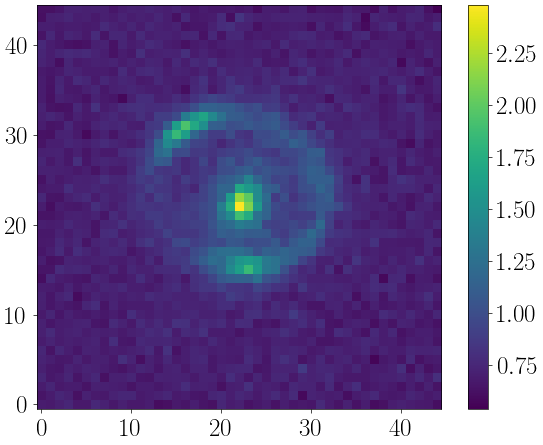

In [8]:
plot.plot(image, colorbar=True)